In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV



In [ ]:
data = pd.read_csv('/Users/prasadbodduboina/Downloads/DS/Neural networks/Alphabets_data.csv')

In [6]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [8]:
data.isna().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [9]:
data.shape

(20000, 17)

In [10]:
f1 = data.iloc[:,0:16]
forest = pd.concat([f1,data['yedgex']],axis=1)
forest

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


<Axes: xlabel='width', ylabel='height'>

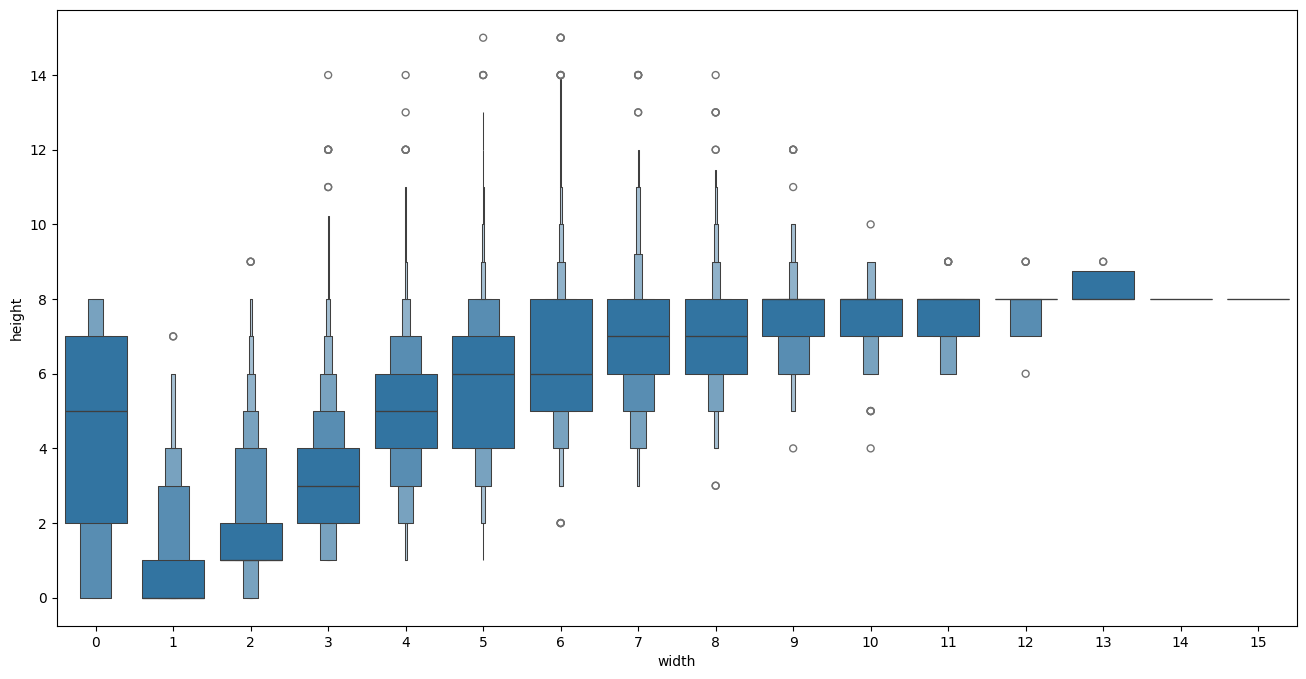

In [11]:
plt.figure(figsize = (16, 8));
sns.boxenplot(x = 'width', y = 'height', data = f1)

<ipython-input-12-a3a9dda5bfc2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(f1['letter'], palette="Set1")


<Axes: xlabel='count', ylabel='letter'>

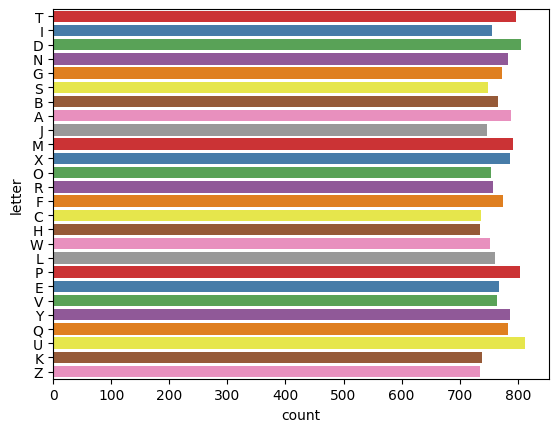

In [12]:
sns.countplot(f1['letter'], palette="Set1")

In [13]:
# Split into features (X) and target label (y)
X = data.drop('letter', axis=1)
Y = data['letter']

In [14]:
# Encode the labels (y) as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

In [15]:
# Normalize the features (X) using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Check the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16000, 16), (4000, 16), (16000,), (4000,))

In [17]:

# Define the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
# Hidden layer(s)
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
# Output layer (using softmax for multi-class classification)
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2615 - loss: 2.5709 - val_accuracy: 0.6783 - val_loss: 1.1083
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7086 - loss: 1.0176 - val_accuracy: 0.7565 - val_loss: 0.8111
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7742 - loss: 0.7825 - val_accuracy: 0.7995 - val_loss: 0.6817
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8149 - loss: 0.6369 - val_accuracy: 0.8217 - val_loss: 0.5905
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8291 - loss: 0.5559 - val_accuracy: 0.8330 - val_loss: 0.5411
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8493 - loss: 0.4987 - val_accuracy: 0.8522 - val_loss: 0.4937
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8640 - loss: 0.4475 - val_accuracy: 0.8625 - val_loss: 0.4549
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8779 - loss: 0.4005 - val_accuracy: 0.8723 - val_

In [18]:
# Convert the Series Y to a NumPy array
Y = Y.to_numpy()

# Use label encoding to convert the string labels to integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0711 - loss: 78.3149
compile_metrics: 6.98%


In [19]:
model.metrics_names

['loss', 'compile_metrics']

In [20]:
scores

[78.16659545898438, 0.06984999775886536]

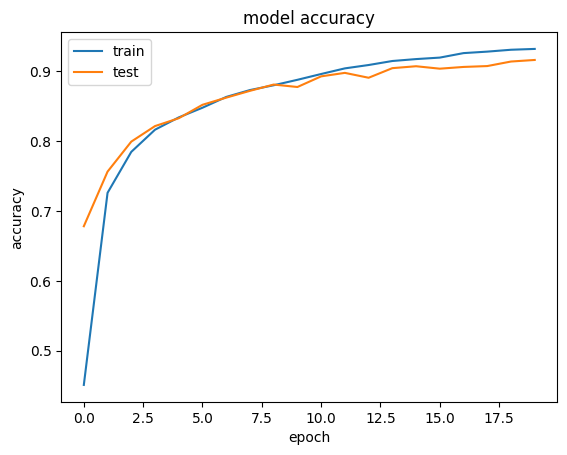

In [21]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

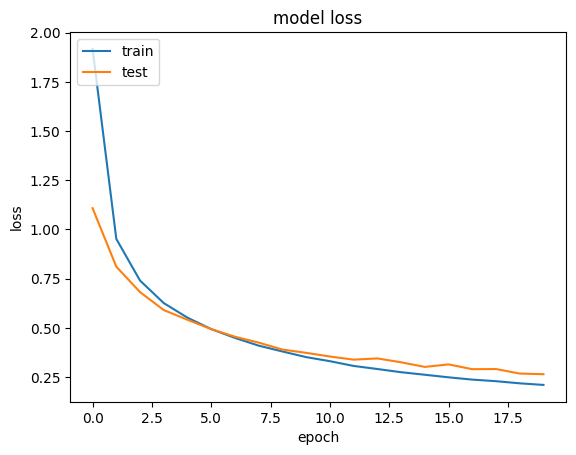

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Neural Network Hyper Parameter**

In [23]:

# Standardization

a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [28]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,-1.030287e-16,3.659295e-17,-8.242296e-17,1.417533e-16,-1.003642e-16,1.104894e-16,4.156675e-17,1.747935e-16,-6.181722e-17,4.440892e-17,9.947598e-17,-1.083578e-16,-1.598721e-18,-4.732215e-16,6.039613e-17,1.790568e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-2.103087e+00,-2.129084e+00,-2.542463e+00,-2.375788e+00,-1.600550e+00,-3.404567e+00,-3.225590e+00,-1.714360e+00,-2.175206e+00,-3.328246e+00,-2.453056e+00,-3.810980e+00,-1.305948e+00,-5.391438e+00,-1.438153e+00,-4.823208e+00
25%,-5.350039e-01,-6.159833e-01,-5.568812e-01,-6.069205e-01,-6.874762e-01,-4.430438e-01,-6.452728e-01,-6.032074e-01,-4.950723e-01,-5.152079e-01,-5.526407e-01,-4.465129e-01,-8.772199e-01,-2.190816e-01,-6.590356e-01,-4.953539e-01
50%,-1.230945e-02,-1.074302e-02,-6.048579e-02,2.775132e-01,-2.309392e-01,5.054332e-02,-2.152199e-01,-2.328234e-01,-7.503896e-02,-1.133453e-01,-1.725577e-01,3.412531e-02,-1.976435e-02,-2.190816e-01,-2.694771e-01,1.229111e-01
75%,5.103850e-01,5.944973e-01,4.359097e-01,7.197301e-01,6.821347e-01,5.441305e-01,6.448857e-01,5.079447e-01,7.650277e-01,6.903799e-01,5.876083e-01,5.147635e-01,4.089634e-01,4.274629e-01,5.096399e-01,7.411760e-01
max,5.737329e+00,2.410218e+00,4.903469e+00,4.257465e+00,5.247504e+00,3.999240e+00,3.225203e+00,3.841401e+00,4.125295e+00,2.699693e+00,3.248189e+00,3.398593e+00,5.124969e+00,4.306730e+00,4.405225e+00,4.450766e+00


**Create model using function:**

In [29]:
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=11, init='uniform', activation='relu'))
    model.add(Dense(11, init='uniform', activation='relu'))
    model.add(Dense(26, init='uniform', activation='softmax'))

    adam=Adam(lr=0.01)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [30]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

**Tuning of Hyperparameters using different techniques**
1. Batch Size and Epochs
2. Learning rate and Drop out rate
3. Activation Function and Kernel Initializer


**1. Batch Size and Epochs**

In [31]:
from keras.models import Sequential

# create model
model = Sequential()
model.add(Dense(14, input_dim=16,  activation='relu')) #1st layer - changed input_dim to 16 to match X_train
model.add(Dense(11,  activation='relu')) #2nd layer
model.add(Dense(26, activation='softmax')) #3rd layer or op layer
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
# Use X_train and y_train, which are the scaled and encoded data for training
history = model.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=10)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1444 - loss: 2.9545 - val_accuracy: 0.4321 - val_loss: 1.8964
Epoch 2/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4929 - loss: 1.6852 - val_accuracy: 0.6042 - val_loss: 1.3497
Epoch 3/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6171 - loss: 1.2821 - val_accuracy: 0.6542 - val_loss: 1.1754
Epoch 4/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6770 - loss: 1.1160 - val_accuracy: 0.6883 - val_loss: 1.0715
Epoch 5/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6973 - loss: 1.0159 - val_accuracy: 0.7105 - val_loss: 1.0059
Epoch 6/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7170 - loss: 0.9463 - val_accuracy: 0.7239 - val_loss: 0.9648
Epoch 7/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7374 - loss: 0.8859 - val_accuracy: 0.7317 - val_loss: 0.9169
Epoch 8/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7406 - loss: 0.8813 - val_accurac

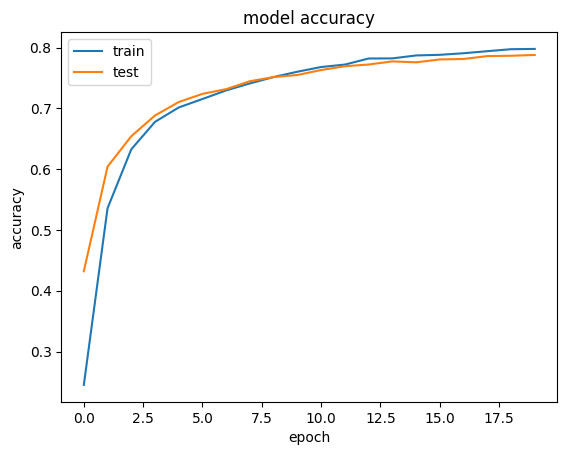

In [32]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

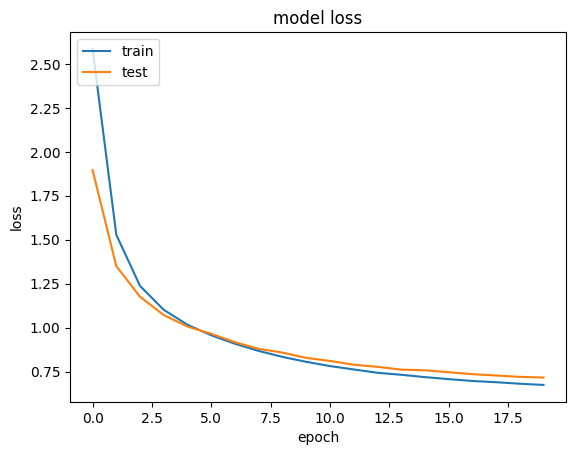

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**2. Learning rate and Drop out rate**

In [34]:
# Define the model
from keras.layers import Dropout # import Dropout
def create_model(learning_rate=0.001, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(11, input_dim=16, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(14, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(26, activation='softmax'))  # For binary classification

    adam = Adam(learning_rate=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy']) # changed loss function

    return model

# Create the KerasClassifier with placeholder arguments for GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0, batch_size=40, epochs=50)

# Define the grid search parameters
learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# Create a dictionary of the grid search parameters
# Use double underscore to separate the function name and parameter name
param_grids = {'model__learning_rate': learning_rate, 'model__dropout_rate': dropout_rate}

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=10)

# Fit the grid search
grid_result = grid.fit(X_standardized, Y)

# Print the best parameters and result
print(f"Best Score: {grid_result.best_score_}")
print(f"Best Params: {grid_result.best_params_}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.809 total time=  42.7s
[CV 2/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.819 total time=  43.2s
[CV 3/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.786 total time=  33.5s
[CV 4/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.812 total time=  36.3s
[CV 5/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.796 total time=  36.0s
[CV 1/5; 2/9] START model__dropout_rate=0.0, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 2/9] END model__dropout_rate=0.0, model__learning_rate=0.01;, score=0.814 total time=  35.5s
[CV 2/5; 2/9] START model__dropout_rate=0.0, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 2/9] END model__dropout_rate=0.0, model__learning_rate=0.01;, score=0.823 total time=  34.2s
[CV 3/5; 2/9] START model__dropout_rate=0.0, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 2/9] END model__dropout_rate=0.0, model__learning_rate=0.01;, score=0.807 total time=  36.3s
[CV 4/5; 2/9] START model__dropout_rate=0.0, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 2/9] END model__dropout_rate=0.0, model__learning_rate=0.01;, score=0.811 total time=  35.8s
[CV 5/5; 2/9] START model__dropout_rate=0.0, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 2/9] END model__dropout_rate=0.0, model__learning_rate=0.01;, score=0.801 total time=  35.4s
[CV 1/5; 3/9] START model__dropout_rate=0.0, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 3/9] END model__dropout_rate=0.0, model__learning_rate=0.1;, score=0.365 total time=  34.0s
[CV 2/5; 3/9] START model__dropout_rate=0.0, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 3/9] END model__dropout_rate=0.0, model__learning_rate=0.1;, score=0.344 total time=  34.8s
[CV 3/5; 3/9] START model__dropout_rate=0.0, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 3/9] END model__dropout_rate=0.0, model__learning_rate=0.1;, score=0.316 total time=  35.3s
[CV 4/5; 3/9] START model__dropout_rate=0.0, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 3/9] END model__dropout_rate=0.0, model__learning_rate=0.1;, score=0.253 total time=  35.7s
[CV 5/5; 3/9] START model__dropout_rate=0.0, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 3/9] END model__dropout_rate=0.0, model__learning_rate=0.1;, score=0.282 total time=  33.1s
[CV 1/5; 4/9] START model__dropout_rate=0.1, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 4/9] END model__dropout_rate=0.1, model__learning_rate=0.001;, score=0.733 total time=  36.3s
[CV 2/5; 4/9] START model__dropout_rate=0.1, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 4/9] END model__dropout_rate=0.1, model__learning_rate=0.001;, score=0.745 total time=  37.7s
[CV 3/5; 4/9] START model__dropout_rate=0.1, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 4/9] END model__dropout_rate=0.1, model__learning_rate=0.001;, score=0.744 total time=  35.7s
[CV 4/5; 4/9] START model__dropout_rate=0.1, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 4/9] END model__dropout_rate=0.1, model__learning_rate=0.001;, score=0.750 total time=  35.9s
[CV 5/5; 4/9] START model__dropout_rate=0.1, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 4/9] END model__dropout_rate=0.1, model__learning_rate=0.001;, score=0.739 total time=  34.5s
[CV 1/5; 5/9] START model__dropout_rate=0.1, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 5/9] END model__dropout_rate=0.1, model__learning_rate=0.01;, score=0.748 total time=  36.5s
[CV 2/5; 5/9] START model__dropout_rate=0.1, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 5/9] END model__dropout_rate=0.1, model__learning_rate=0.01;, score=0.750 total time=  36.0s
[CV 3/5; 5/9] START model__dropout_rate=0.1, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 5/9] END model__dropout_rate=0.1, model__learning_rate=0.01;, score=0.718 total time=  35.6s
[CV 4/5; 5/9] START model__dropout_rate=0.1, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 5/9] END model__dropout_rate=0.1, model__learning_rate=0.01;, score=0.750 total time=  41.5s
[CV 5/5; 5/9] START model__dropout_rate=0.1, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 5/9] END model__dropout_rate=0.1, model__learning_rate=0.01;, score=0.717 total time=  32.9s
[CV 1/5; 6/9] START model__dropout_rate=0.1, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 6/9] END model__dropout_rate=0.1, model__learning_rate=0.1;, score=0.071 total time=  34.7s
[CV 2/5; 6/9] START model__dropout_rate=0.1, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 6/9] END model__dropout_rate=0.1, model__learning_rate=0.1;, score=0.143 total time=  35.8s
[CV 3/5; 6/9] START model__dropout_rate=0.1, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 6/9] END model__dropout_rate=0.1, model__learning_rate=0.1;, score=0.089 total time=  35.1s
[CV 4/5; 6/9] START model__dropout_rate=0.1, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 6/9] END model__dropout_rate=0.1, model__learning_rate=0.1;, score=0.067 total time=  37.2s
[CV 5/5; 6/9] START model__dropout_rate=0.1, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 6/9] END model__dropout_rate=0.1, model__learning_rate=0.1;, score=0.069 total time=  35.3s
[CV 1/5; 7/9] START model__dropout_rate=0.2, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 7/9] END model__dropout_rate=0.2, model__learning_rate=0.001;, score=0.700 total time=  36.8s
[CV 2/5; 7/9] START model__dropout_rate=0.2, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 7/9] END model__dropout_rate=0.2, model__learning_rate=0.001;, score=0.705 total time=  36.1s
[CV 3/5; 7/9] START model__dropout_rate=0.2, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 7/9] END model__dropout_rate=0.2, model__learning_rate=0.001;, score=0.691 total time=  35.3s
[CV 4/5; 7/9] START model__dropout_rate=0.2, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 7/9] END model__dropout_rate=0.2, model__learning_rate=0.001;, score=0.721 total time=  33.1s
[CV 5/5; 7/9] START model__dropout_rate=0.2, model__learning_rate=0.001.........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 7/9] END model__dropout_rate=0.2, model__learning_rate=0.001;, score=0.690 total time=  34.8s
[CV 1/5; 8/9] START model__dropout_rate=0.2, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 8/9] END model__dropout_rate=0.2, model__learning_rate=0.01;, score=0.692 total time=  35.0s
[CV 2/5; 8/9] START model__dropout_rate=0.2, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 8/9] END model__dropout_rate=0.2, model__learning_rate=0.01;, score=0.685 total time=  33.1s
[CV 3/5; 8/9] START model__dropout_rate=0.2, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 8/9] END model__dropout_rate=0.2, model__learning_rate=0.01;, score=0.662 total time=  34.7s
[CV 4/5; 8/9] START model__dropout_rate=0.2, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 8/9] END model__dropout_rate=0.2, model__learning_rate=0.01;, score=0.714 total time=  35.0s
[CV 5/5; 8/9] START model__dropout_rate=0.2, model__learning_rate=0.01..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 8/9] END model__dropout_rate=0.2, model__learning_rate=0.01;, score=0.694 total time=  33.6s
[CV 1/5; 9/9] START model__dropout_rate=0.2, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 9/9] END model__dropout_rate=0.2, model__learning_rate=0.1;, score=0.058 total time=  34.3s
[CV 2/5; 9/9] START model__dropout_rate=0.2, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 9/9] END model__dropout_rate=0.2, model__learning_rate=0.1;, score=0.070 total time=  37.0s
[CV 3/5; 9/9] START model__dropout_rate=0.2, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 9/9] END model__dropout_rate=0.2, model__learning_rate=0.1;, score=0.067 total time=  35.0s
[CV 4/5; 9/9] START model__dropout_rate=0.2, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 9/9] END model__dropout_rate=0.2, model__learning_rate=0.1;, score=0.078 total time=  34.5s
[CV 5/5; 9/9] START model__dropout_rate=0.2, model__learning_rate=0.1...........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 9/9] END model__dropout_rate=0.2, model__learning_rate=0.1;, score=0.099 total time=  35.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Score: 0.8112999999999999
Best Params: {'model__dropout_rate': 0.0, 'model__learning_rate': 0.01}


In [35]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8112999999999999, using {'model__dropout_rate': 0.0, 'model__learning_rate': 0.01}
0.8043000000000001,0.011858962855157291 with: {'model__dropout_rate': 0.0, 'model__learning_rate': 0.001}
0.8112999999999999,0.00715960892786748 with: {'model__dropout_rate': 0.0, 'model__learning_rate': 0.01}
0.3119,0.04050049382414986 with: {'model__dropout_rate': 0.0, 'model__learning_rate': 0.1}
0.7419500000000001,0.006075360071633586 with: {'model__dropout_rate': 0.1, 'model__learning_rate': 0.001}
0.7367,0.015599198697369032 with: {'model__dropout_rate': 0.1, 'model__learning_rate': 0.01}
0.08764999999999998,0.028886675128854823 with: {'model__dropout_rate': 0.1, 'model__learning_rate': 0.1}
0.7012,0.011277632730320687 with: {'model__dropout_rate': 0.2, 'model__learning_rate': 0.001}
0.6893,0.016394663765994116 with: {'model__dropout_rate': 0.2, 'model__learning_rate': 0.01}
0.0744,0.013870472234210342 with: {'model__dropout_rate': 0.2, 'model__learning_rate': 0.1}



**3. Activation Function and Kernel Initializer**

In [36]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(64,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(32,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(26,activation = 'softmax'))

    adam = adam(lr = 0.001)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [37]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)

In [38]:
# Define the grid search parameters
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,
                   init = init)

In [42]:


# Define the model
def create_model(activation_function='relu',init='normal'): # Removed extraneous arguments
    model = Sequential()
    model.add(Dense(64, input_dim=16, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(0.2)) # Set dropout rate to constant
    model.add(Dense(32, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(0.2)) # Set dropout rate to constant
    model.add(Dense(26, activation='softmax'))  # For binary classification

    adam = Adam(learning_rate=0.001) # Set learning rate to constant

    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

# Create the KerasClassifier with placeholder arguments for GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0, batch_size=40, epochs=50)

# Define the grid search parameters
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# Create a dictionary of the grid search parameters
# Use double underscore to separate the function name and parameter name
param_grids = {'model__activation_function':activation_function,
               'model__init':init
              }

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=10)

# Fit the grid search
grid_result = grid.fit(X_standardized, Y)

# Print the best parameters and result
print(f"Best Score: {grid_result.best_score_}")
print(f"Best Params: {grid_result.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START model__activation_function=softmax, model__init=uniform....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 1/12] END model__activation_function=softmax, model__init=uniform;, score=0.756 total time=  37.8s
[CV 2/5; 1/12] START model__activation_function=softmax, model__init=uniform....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 1/12] END model__activation_function=softmax, model__init=uniform;, score=0.771 total time=  38.4s
[CV 3/5; 1/12] START model__activation_function=softmax, model__init=uniform....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 1/12] END model__activation_function=softmax, model__init=uniform;, score=0.753 total time=  38.1s
[CV 4/5; 1/12] START model__activation_function=softmax, model__init=uniform....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 1/12] END model__activation_function=softmax, model__init=uniform;, score=0.735 total time=  38.2s
[CV 5/5; 1/12] START model__activation_function=softmax, model__init=uniform....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 1/12] END model__activation_function=softmax, model__init=uniform;, score=0.753 total time=  37.2s
[CV 1/5; 2/12] START model__activation_function=softmax, model__init=normal.....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 2/12] END model__activation_function=softmax, model__init=normal;, score=0.716 total time=  36.8s
[CV 2/5; 2/12] START model__activation_function=softmax, model__init=normal.....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 2/12] END model__activation_function=softmax, model__init=normal;, score=0.741 total time=  36.7s
[CV 3/5; 2/12] START model__activation_function=softmax, model__init=normal.....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 2/12] END model__activation_function=softmax, model__init=normal;, score=0.739 total time=  34.6s
[CV 4/5; 2/12] START model__activation_function=softmax, model__init=normal.....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 2/12] END model__activation_function=softmax, model__init=normal;, score=0.754 total time=  52.4s
[CV 5/5; 2/12] START model__activation_function=softmax, model__init=normal.....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 2/12] END model__activation_function=softmax, model__init=normal;, score=0.700 total time=  46.9s
[CV 1/5; 3/12] START model__activation_function=softmax, model__init=zero.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 3/12] END model__activation_function=softmax, model__init=zero;, score=0.766 total time=  47.7s
[CV 2/5; 3/12] START model__activation_function=softmax, model__init=zero.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 3/12] END model__activation_function=softmax, model__init=zero;, score=0.755 total time=  40.3s
[CV 3/5; 3/12] START model__activation_function=softmax, model__init=zero.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 3/12] END model__activation_function=softmax, model__init=zero;, score=0.748 total time=  36.6s
[CV 4/5; 3/12] START model__activation_function=softmax, model__init=zero.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 3/12] END model__activation_function=softmax, model__init=zero;, score=0.763 total time=  35.1s
[CV 5/5; 3/12] START model__activation_function=softmax, model__init=zero.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 3/12] END model__activation_function=softmax, model__init=zero;, score=0.746 total time=  36.6s
[CV 1/5; 4/12] START model__activation_function=relu, model__init=uniform.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 4/12] END model__activation_function=relu, model__init=uniform;, score=0.899 total time=  37.1s
[CV 2/5; 4/12] START model__activation_function=relu, model__init=uniform.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 4/12] END model__activation_function=relu, model__init=uniform;, score=0.905 total time=  37.3s
[CV 3/5; 4/12] START model__activation_function=relu, model__init=uniform.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 4/12] END model__activation_function=relu, model__init=uniform;, score=0.893 total time=  35.8s
[CV 4/5; 4/12] START model__activation_function=relu, model__init=uniform.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 4/12] END model__activation_function=relu, model__init=uniform;, score=0.904 total time=  34.5s
[CV 5/5; 4/12] START model__activation_function=relu, model__init=uniform.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 4/12] END model__activation_function=relu, model__init=uniform;, score=0.888 total time=  35.7s
[CV 1/5; 5/12] START model__activation_function=relu, model__init=normal........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 5/12] END model__activation_function=relu, model__init=normal;, score=0.896 total time=  35.0s
[CV 2/5; 5/12] START model__activation_function=relu, model__init=normal........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 5/12] END model__activation_function=relu, model__init=normal;, score=0.906 total time=  34.8s
[CV 3/5; 5/12] START model__activation_function=relu, model__init=normal........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 5/12] END model__activation_function=relu, model__init=normal;, score=0.891 total time=  34.8s
[CV 4/5; 5/12] START model__activation_function=relu, model__init=normal........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 5/12] END model__activation_function=relu, model__init=normal;, score=0.904 total time=  35.9s
[CV 5/5; 5/12] START model__activation_function=relu, model__init=normal........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 5/12] END model__activation_function=relu, model__init=normal;, score=0.895 total time=  35.2s
[CV 1/5; 6/12] START model__activation_function=relu, model__init=zero..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 6/12] END model__activation_function=relu, model__init=zero;, score=0.040 total time=  33.6s
[CV 2/5; 6/12] START model__activation_function=relu, model__init=zero..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 6/12] END model__activation_function=relu, model__init=zero;, score=0.040 total time=  37.1s
[CV 3/5; 6/12] START model__activation_function=relu, model__init=zero..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 6/12] END model__activation_function=relu, model__init=zero;, score=0.037 total time=  50.5s
[CV 4/5; 6/12] START model__activation_function=relu, model__init=zero..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 6/12] END model__activation_function=relu, model__init=zero;, score=0.040 total time=  42.3s
[CV 5/5; 6/12] START model__activation_function=relu, model__init=zero..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 6/12] END model__activation_function=relu, model__init=zero;, score=0.036 total time=  39.1s
[CV 1/5; 7/12] START model__activation_function=tanh, model__init=uniform.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 7/12] END model__activation_function=tanh, model__init=uniform;, score=0.888 total time=  40.5s
[CV 2/5; 7/12] START model__activation_function=tanh, model__init=uniform.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 7/12] END model__activation_function=tanh, model__init=uniform;, score=0.894 total time=  35.8s
[CV 3/5; 7/12] START model__activation_function=tanh, model__init=uniform.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 7/12] END model__activation_function=tanh, model__init=uniform;, score=0.864 total time=  36.5s
[CV 4/5; 7/12] START model__activation_function=tanh, model__init=uniform.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 7/12] END model__activation_function=tanh, model__init=uniform;, score=0.893 total time=  36.7s
[CV 5/5; 7/12] START model__activation_function=tanh, model__init=uniform.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 7/12] END model__activation_function=tanh, model__init=uniform;, score=0.878 total time=  36.9s
[CV 1/5; 8/12] START model__activation_function=tanh, model__init=normal........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 8/12] END model__activation_function=tanh, model__init=normal;, score=0.890 total time=  34.9s
[CV 2/5; 8/12] START model__activation_function=tanh, model__init=normal........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 8/12] END model__activation_function=tanh, model__init=normal;, score=0.887 total time=  35.5s
[CV 3/5; 8/12] START model__activation_function=tanh, model__init=normal........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 8/12] END model__activation_function=tanh, model__init=normal;, score=0.868 total time=  35.7s
[CV 4/5; 8/12] START model__activation_function=tanh, model__init=normal........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 8/12] END model__activation_function=tanh, model__init=normal;, score=0.891 total time=  35.3s
[CV 5/5; 8/12] START model__activation_function=tanh, model__init=normal........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 8/12] END model__activation_function=tanh, model__init=normal;, score=0.875 total time=  35.4s
[CV 1/5; 9/12] START model__activation_function=tanh, model__init=zero..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 9/12] END model__activation_function=tanh, model__init=zero;, score=0.040 total time=  34.2s
[CV 2/5; 9/12] START model__activation_function=tanh, model__init=zero..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 9/12] END model__activation_function=tanh, model__init=zero;, score=0.040 total time=  35.5s
[CV 3/5; 9/12] START model__activation_function=tanh, model__init=zero..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 9/12] END model__activation_function=tanh, model__init=zero;, score=0.037 total time=  37.7s
[CV 4/5; 9/12] START model__activation_function=tanh, model__init=zero..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 9/12] END model__activation_function=tanh, model__init=zero;, score=0.040 total time=  35.5s
[CV 5/5; 9/12] START model__activation_function=tanh, model__init=zero..........


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 9/12] END model__activation_function=tanh, model__init=zero;, score=0.036 total time=  36.1s
[CV 1/5; 10/12] START model__activation_function=linear, model__init=uniform....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 10/12] END model__activation_function=linear, model__init=uniform;, score=0.763 total time=  34.3s
[CV 2/5; 10/12] START model__activation_function=linear, model__init=uniform....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 10/12] END model__activation_function=linear, model__init=uniform;, score=0.764 total time=  35.2s
[CV 3/5; 10/12] START model__activation_function=linear, model__init=uniform....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 10/12] END model__activation_function=linear, model__init=uniform;, score=0.753 total time=  35.5s
[CV 4/5; 10/12] START model__activation_function=linear, model__init=uniform....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 10/12] END model__activation_function=linear, model__init=uniform;, score=0.772 total time=  33.8s
[CV 5/5; 10/12] START model__activation_function=linear, model__init=uniform....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 10/12] END model__activation_function=linear, model__init=uniform;, score=0.758 total time=  39.3s
[CV 1/5; 11/12] START model__activation_function=linear, model__init=normal.....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 11/12] END model__activation_function=linear, model__init=normal;, score=0.763 total time=  37.1s
[CV 2/5; 11/12] START model__activation_function=linear, model__init=normal.....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 11/12] END model__activation_function=linear, model__init=normal;, score=0.775 total time=  38.2s
[CV 3/5; 11/12] START model__activation_function=linear, model__init=normal.....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 11/12] END model__activation_function=linear, model__init=normal;, score=0.754 total time=  36.3s
[CV 4/5; 11/12] START model__activation_function=linear, model__init=normal.....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 11/12] END model__activation_function=linear, model__init=normal;, score=0.784 total time=  36.5s
[CV 5/5; 11/12] START model__activation_function=linear, model__init=normal.....


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 11/12] END model__activation_function=linear, model__init=normal;, score=0.758 total time=  36.4s
[CV 1/5; 12/12] START model__activation_function=linear, model__init=zero.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 12/12] END model__activation_function=linear, model__init=zero;, score=0.040 total time=  35.1s
[CV 2/5; 12/12] START model__activation_function=linear, model__init=zero.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 12/12] END model__activation_function=linear, model__init=zero;, score=0.040 total time=  35.3s
[CV 3/5; 12/12] START model__activation_function=linear, model__init=zero.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 12/12] END model__activation_function=linear, model__init=zero;, score=0.037 total time=  33.9s
[CV 4/5; 12/12] START model__activation_function=linear, model__init=zero.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 12/12] END model__activation_function=linear, model__init=zero;, score=0.040 total time=  34.7s
[CV 5/5; 12/12] START model__activation_function=linear, model__init=zero.......


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 12/12] END model__activation_function=linear, model__init=zero;, score=0.036 total time=  35.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Score: 0.89855
Best Params: {'model__activation_function': 'relu', 'model__init': 'normal'}


In [43]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.89855, using {'model__activation_function': 'relu', 'model__init': 'normal'}
0.75365,0.011511515973146199 with: {'model__activation_function': 'softmax', 'model__init': 'uniform'}
0.7300500000000001,0.019425112612286185 with: {'model__activation_function': 'softmax', 'model__init': 'normal'}
0.7554000000000001,0.008132650244538967 with: {'model__activation_function': 'softmax', 'model__init': 'zero'}
0.89795,0.006563916513789611 with: {'model__activation_function': 'relu', 'model__init': 'uniform'}
0.89855,0.005620053380529417 with: {'model__activation_function': 'relu', 'model__init': 'normal'}
0.03855,0.0016385969608173955 with: {'model__activation_function': 'relu', 'model__init': 'zero'}
0.88365,0.011281179016397183 with: {'model__activation_function': 'tanh', 'model__init': 'uniform'}
0.8820500000000001,0.00935200513259053 with: {'model__activation_function': 'tanh', 'model__init': 'normal'}
0.03855,0.0016385969608173955 with: {'model__activation_function': 'tanh', 'model